In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [92]:
df = pd.read_csv('medical_insurance.csv')

In [3]:
df.shape

(100000, 54)

# **CALIDAD DEL DATO**

### Integridad

In [94]:
total_cells = df.shape[0] * df.shape[1]
missing_values = df.isna().sum().sum()

Integridad_KPI = 100 * (1 - missing_values/total_cells)
print(f'KPI Integridad : {Integridad_KPI: .2f}%')

missing_by_col = 100 * df.isna().sum() / df.shape[0]
dict_integridad_col = missing_by_col.to_dict()
for k, v in dict_integridad_col.items():
    if v != 0 : 
        print(k, v)

KPI Integridad :  99.44%
alcohol_freq 30.083


### Consistencia

In [5]:
#Columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cat_scores = []
for col in categorical_cols:
    col_lower = col.lower()
    if col_lower == 'sex':
        valid = set(['Female', 'Male', 'Other'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'region':
        valid = set(['North', 'Central', 'West', 'South', 'East'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'urban_rural':
        valid = set(['Suburban', 'Urban', 'Rural'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'education':
        valid = set(['Doctorate', 'No HS', 'HS', 'Some College', 'Masters', 'Bachelors'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'marital_status':
        valid = set(['Married', 'Single', 'Divorced', 'Widowed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'employment_status':
        valid = set(['Retired', 'Employed', 'Self-employed', 'Unemployed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'smoker':
        valid = set(['Never', 'Current', 'Former'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'alcohol_freq':
        valid = set(['None', 'Weekly', 'Daily', 'Occasional'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'plan_type':
        valid = set(['PPO', 'POS', 'HMO', 'EPO'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'network_tier':
        valid = set(['Bronze', 'Gold', 'Platinum', 'Silver'])
        score = 100 * df[col].isin(valid).mean()
    else:
        #Para el resto solo se comprueba que no sea nula
        score = 100 * (1 - df[col].isnull().mean())
    cat_scores.append(score)

num_scores = []
for col in numeric_cols:
    coerced = pd.to_numeric(df[col], errors='coerce')
    score = 100 * (1 - coerced.isnull().mean())
    num_scores.append(score)

if len(categorical_cols) + len(numeric_cols) > 0:
    Consistencia_KPI = (sum(cat_scores) + sum(num_scores)) / (len(cat_scores) + len(num_scores))
else:
    Consistencia_KPI = 100.0

print(f"\nConsistencia (KPI): {Consistencia_KPI:.2f} %")


Consistencia (KPI): 99.44 %


### Validez

Como no conocemos los valores tipicos de la mayoria de nuestras columnas solo vamos a mirar el describe y los min-max que propone y ver si algo nos parece sorprendente.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_id,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.5000,75000.2500,100000.00
age,100000.0,47.521500,15.988752,0.00,37.0000,48.0000,58.0000,100.00
income,100000.0,49873.905000,46800.214127,1100.00,21100.0000,36200.0000,62200.0000,1061800.00
household_size,100000.0,2.430900,1.075126,1.00,2.0000,2.0000,3.0000,9.00
dependents,100000.0,0.898380,0.950654,0.00,0.0000,1.0000,1.0000,7.00
bmi,100000.0,26.990512,4.994883,12.00,23.6000,27.0000,30.4000,50.40
visits_last_year,100000.0,1.927650,1.737730,0.00,1.0000,2.0000,3.0000,25.00
hospitalizations_last_3yrs,100000.0,0.093640,0.304848,0.00,0.0000,0.0000,0.0000,3.00
days_hospitalized_last_3yrs,100000.0,0.373350,1.373011,0.00,0.0000,0.0000,0.0000,21.00
medication_count,100000.0,1.236320,1.209358,0.00,0.0000,1.0000,2.0000,11.00


### Unicidad

In [7]:
total_rows = df.shape[0]
duplicated_rows = df.duplicated().sum()

Unicidad_KPI = 100* (1- duplicated_rows/total_rows)
print(f'KPI Unicidad : {Unicidad_KPI}%')

KPI Unicidad : 100.0%


### Precision

In [8]:
precision_scores = []


for col in numeric_cols:
    col_mean = df[col].mean()
    col_std = df[col].std()
    lower, upper = col_mean - 3 * col_std, col_mean + 3 * col_std
    in_range = df[col].between(lower, upper, inclusive='both')
    score = 100 * in_range.mean()
    precision_scores.append(score)

if len(precision_scores) > 0:
    Precision_KPI = sum(precision_scores) / len(precision_scores)
else:
    Precision_KPI = 100.0

print(f"\nPrecisión (KPI proxy): {Precision_KPI:.2f} %")


Precisión (KPI proxy): 98.26 %


In [97]:
kpis = {
    'Integridad': Integridad_KPI,
    'Consistencia': Consistencia_KPI,
    'Unicidad': Unicidad_KPI,
    'Precisión': Precision_KPI
}

def kpi_color(value):
    if value < 50:
        return 'red'
    elif value < 80:
        return 'orange'
    else:
        return 'green'

fig = make_subplots(
    rows=1, cols=4,
    specs=[[{'type':'indicator'}]*4]
)

for idx, (name, value) in enumerate(kpis.items()):
    fig.add_trace(go.Indicator(
    mode='gauge+number',
    value=value,
    title={'text': name, 'font': {'size': 16}},
    gauge={
        'axis': {'range':[0,100]},
        'bar': {'color': kpi_color(value)},
        'steps': [
            {'range':[0,50],'color':'lightcoral'},
            {'range':[50,80],'color':'khaki'},
            {'range':[80,100],'color':'lightgreen'}
        ],
    },
    number={'suffix':' %', 'font':{'size':26}, 'valueformat':'.2f'}  # <-- aquí
), row=1, col=idx+1)


fig.update_layout(
    title={'text':'Dashboard de Calidad de Datos','x':0.5,'font':{'size':22}},
    height=300, width=1000, margin=dict(t=80, b=20)
)


fig.show()

### **Analisis exploratoria**

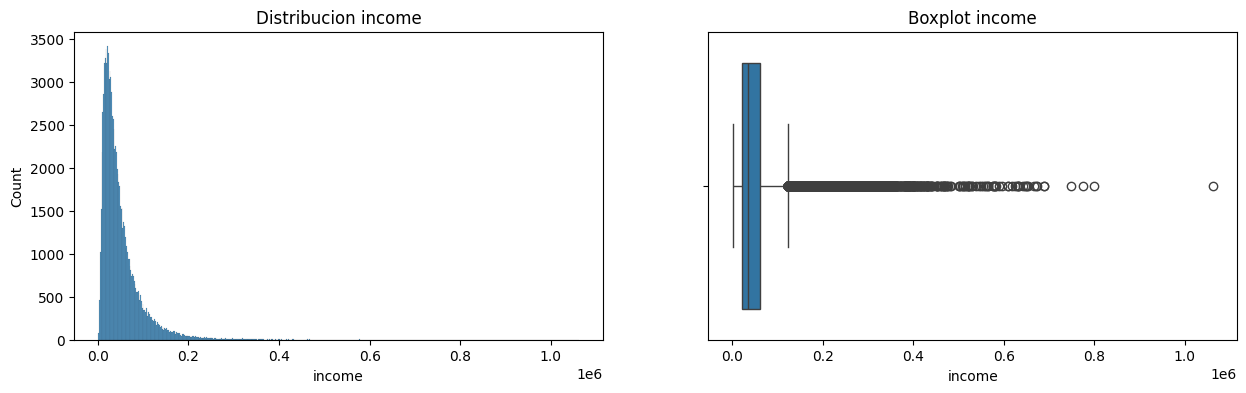

In [60]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df['income'], ax=ax[0])
ax[0].set_title("Distribucion income")
sns.boxplot(df['income'], orient='y', ax=ax[1])
ax[1].set_title("Boxplot income")
plt.show()

income (pas de 0) / annual_medical_cost (pas de 0)/ annual_premium (pas de 0) / monthly_premium / avg_claim_amount (Des 0) / total_claims_paid (des 0)

Text(0.5, 1.0, 'Distribucion total claims paid')

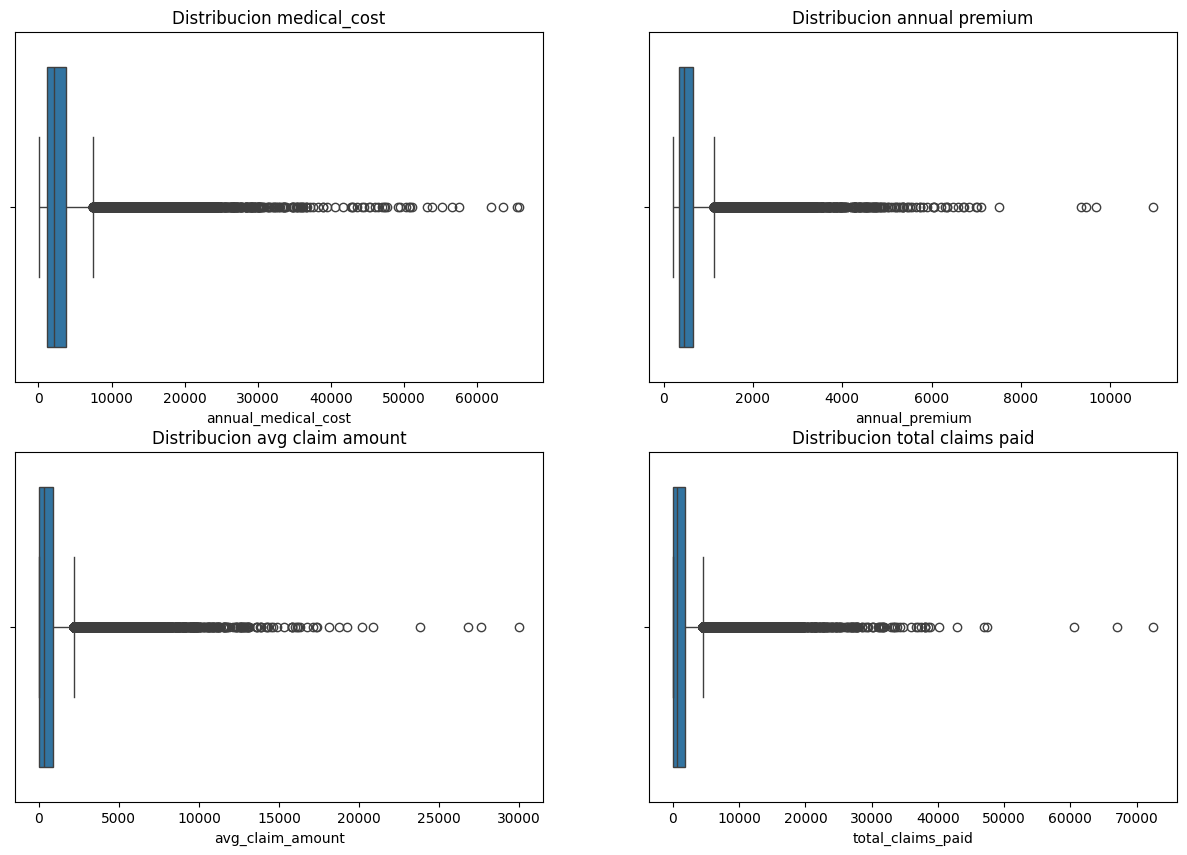

In [69]:
list_money= ["annual_medical_cost","annual_premium", "avg_claim_amount", "total_claims_paid" ]

fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(df['annual_medical_cost'], orient='y', ax=ax[0,0])
ax[0,0].set_title("Distribucion medical_cost")

sns.boxplot(df['annual_premium'], orient='y',ax=ax[0,1])
ax[0,1].set_title("Distribucion annual premium")

sns.boxplot(df['avg_claim_amount'],orient='y', ax=ax[1,0])
ax[1,0].set_title("Distribucion avg claim amount")

sns.boxplot(df['total_claims_paid'], orient='y',ax=ax[1,1])
ax[1,1].set_title("Distribucion total claims paid")

Se puede ver que todas las columnas que describen un monto tienen una distribucion sesgada hasta la derecha con outliers potentes. Entonces nos pareceria relevante hacer un log sobre los valores. Tendremos que tener en cuenta que 'avg_claim_amount' y 'total_claims_paid' tienen valores nulas cuando les tratamos.

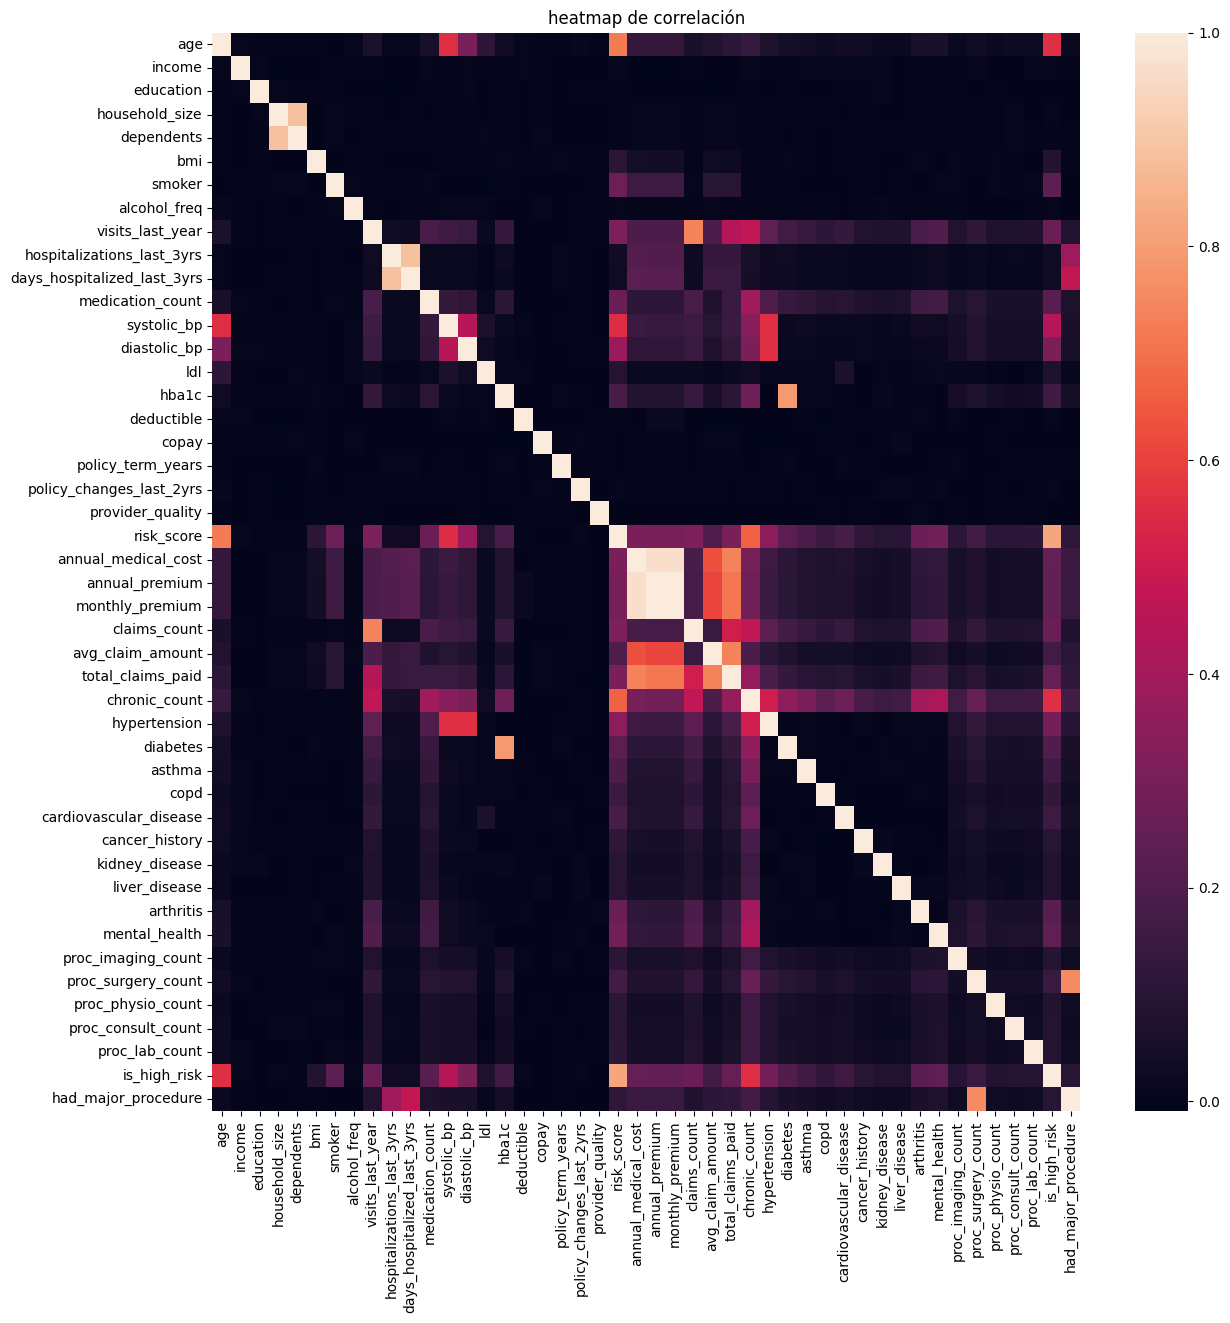

In [41]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.pop(0)
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, fmt=".2f", ax=ax)
ax.set_title("heatmap de correlación")
plt.show()

Con esa matriz de correlacion podemos ver que no tenemos muchas columnas que son altamente correlacionadas, lo que significa que no tenemos muchas posibilidades de simplemente suprimir algunas columnas.  

<Axes: xlabel='monthly_premium', ylabel='annual_premium'>

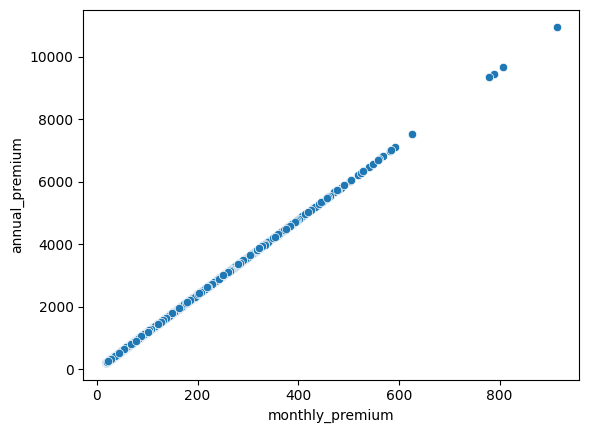

In [78]:
sns.scatterplot(df, x='monthly_premium', y='annual_premium')

Aqui la correlacion perfecta entre monthly premium y annual_premium se confirma sin ningun desviacion.  
Solo eliminaremos el 'monthly_premium' que es exactament 'annual_premium' / 12

<Axes: xlabel='age', ylabel='risk_score'>

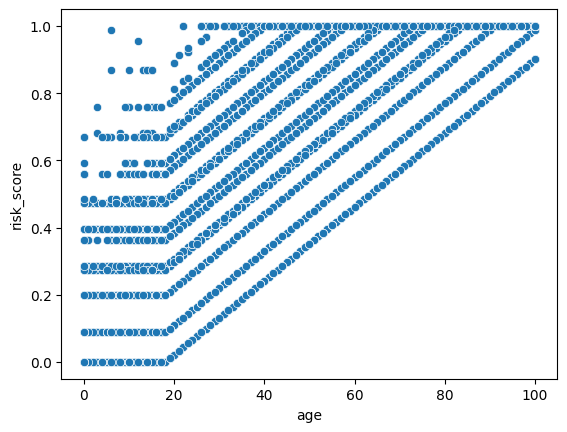

In [77]:
sns.scatterplot(df, x='age', y='risk_score')

# **Tratamiento**

Primeramente suprimimos la columna de monthly_premium ya que tenemos la a nivel anual que nos da la informacion a escala mas comparable y relevante con las otras columnas similares.

In [ ]:
df = df.drop(columns='monthly_premium')

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'claims_count',
       'avg_claim_amount', 'total_claims_paid', 'chronic_count',
       'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease',
       'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis',
       'mental_health', 'proc_imaging_count', 'proc_surgery_count',
       'proc_physio_count', 'proc_consult_count', 'proc_lab_count',
       'is_high_risk', 'had_major_procedure'],
      dtype='object')

### faltantes

Al calcular la Integridad habiamos visto en su detalle que estaba la columna de 'alcohol_freq' a la cual faltaba datos. Vamos a hacer un enfoco sobre esta columna.

In [98]:
vals = df['alcohol_freq'].unique().tolist()
missing_percentage = round(100 * float(df['alcohol_freq'].isna().sum() / df.shape[0]),1)

print(f"{vals} son los valores de la columna")
print(f'Los nan representan {missing_percentage}%  de esas')

[nan, 'Weekly', 'Daily', 'Occasional'] son los valores de la columna
Los nan representan 30.1%  de esas


Como podemos ver no hay una opcion para los que no beben alcohol en absoluto. Asi podemos suponer que los nan no viene de datos faltantes sino que de gente que nunca consuma alcohol. Para confirmar eso necesitariamos la proporcion de no-bebedores en los EEUU.  
Despues de una rapida investigacion, nuestra hipotesis parece justa : https://www.cdc.gov/nchs/products/databriefs/db374.htm ya que se expecte un 30% de no bebedores.  
  
Entonces vamos a asignar un valor de 'Never' a los nan de la columna a fin de que sea mas claro que los datos no son faltantes y tienen sentidos.

In [119]:
df['alcohol_freq'] = df['alcohol_freq'].fillna('Never')
df

,person_id,age,sex,region,urban_rural,education,marital_status,employment_status,household_size,dependents,...,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure,log_income,log_annual_medical_cost,log_annual_premium,log_avg_claim_amount,log_total_claims_paid
0,75722,52,Female,North,Suburban,Doctorate,Married,Retired,3,1,...,2,0,1,0,0,10.030164,8.844922,6.776564,8.449683,8.449683
1,80185,79,Female,North,Urban,No HS,Married,Employed,3,1,...,1,0,1,1,0,9.457279,7.398548,6.100543,5.697999,7.081776
2,19865,68,Male,North,Rural,HS,Married,Retired,5,3,...,2,1,0,1,0,10.614008,8.944030,7.338901,0.000000,0.000000
3,76700,15,Male,North,Suburban,Some College,Married,Self-employed,5,3,...,0,1,0,0,0,9.655090,8.543108,6.711290,0.000000,0.000000
4,92992,53,Male,Central,Suburban,Doctorate,Married,Self-employed,2,0,...,1,1,0,1,0,11.403122,7.439401,6.218461,6.910990,6.910990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,50,Male,West,Urban,No HS,Married,Employed,2,0,...,1,0,0,0,0,11.753524,7.167069,5.800062,0.000000,0.000000
99996,54887,42,Male,East,Suburban,HS,Married,Employed,2,0,...,0,0,0,0,0,9.980495,7.281200,6.052583,0.000000,0.000000
99997,76821,41,Male,West,Rural,HS,Divorced,Unemployed,1,0,...,1,0,0,0,0,11.313266,7.737180,6.283948,5.747991,7.824638
99998,861,51,Female,South,Urban,Doctorate,Single,Unemployed,3,2,...,2,2,1,0,0,10.678238,7.155209,5.840235,6.316045,7.008288


Vamos a cambiar algunas columnas numericas que nos parecen importante para la segmentacion en numéricas ordenales. Asi el algoritmo de PCA podra tomarles en cuenta.

In [120]:
map_education = {'No HS':0, 'HS':1, 'Some College':2, "Bachelors":3, 'Masters':4, 'Doctorate':5}
map_smoker = {'Never' : 0, 'Former' : 2, 'Current' : 4}
map_alcohol = {'Never' : 0, 'Occasional' : 1, 'Weekly' : 2, 'Daily': 3}

df['education'] = df['education'].map(lambda x: map_education[x])
df['smoker'] = df['smoker'].map(lambda x: map_smoker[x])
df['alcohol_freq'] = df['alcohol_freq'].map(lambda x: map_alcohol[x])

### Outliers 

En la parte de exploracion hemos visto que las columnas represantantes de montos de dinero tienen una distribucion con un sesgo a la derecha y un monton de outliers. Como vamos a escalar posterioramente y que para nuestro clustering intentaramos trabajor con K-Means, vamos a aplicar un logaritmo.  
Como tenemos dos de esas columnas que contienen valores de 0, utilizamos el log(x+1) y no el log basico. 

In [104]:
#income (pas de 0) / annual_medical_cost (pas de 0)/ annual_premium (pas de 0) / monthly_premium / avg_claim_amount (Des 0)
df['log_income'] = df['income'].map(lambda x: np.log(x + 1))
df['log_annual_medical_cost'] = df['annual_medical_cost'].map(lambda x: np.log(x + 1))
df['log_annual_premium'] = df['annual_premium'].map(lambda x: np.log(x + 1))
df['log_avg_claim_amount'] = df['avg_claim_amount'].map(lambda x: np.log(x + 1))
df['log_total_claims_paid'] = df['total_claims_paid'].map(lambda x: np.log(x + 1))

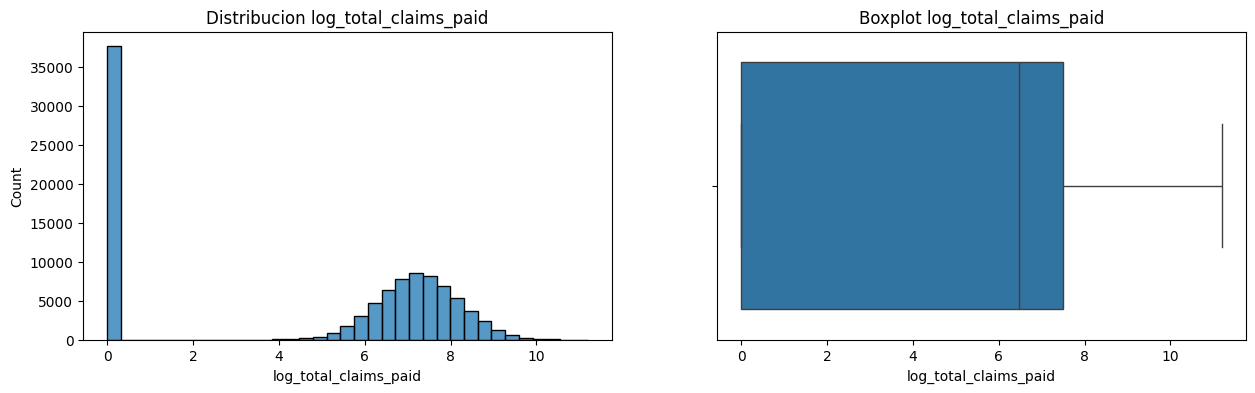

In [111]:
e = 'log_total_claims_paid'
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df[e], ax=ax[0])
ax[0].set_title(f"Distribucion {e}")
sns.boxplot(df[e], orient='y', ax=ax[1])
ax[1].set_title(f"Boxplot {e}")
plt.show()

In [113]:
df = df.drop(columns=['income','annual_medical_cost','annual_premium','avg_claim_amount','total_claims_paid'])

In [114]:
df.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'education',
       'marital_status', 'employment_status', 'household_size', 'dependents',
       'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'claims_count', 'chronic_count', 'hypertension', 'diabetes', 'asthma',
       'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure', 'log_income',
       'log_annual_medical_cost', 'log_annual_premium', 'log_avg_claim_amount',
       'log_total_claims_paid'],
     

### **PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from umap import UMAP

c:\Users\Roxane\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [129]:
def scree_plot(pca, title='Scree plot'):
    fig, ax = plt.subplots(figsize=(15,4))
    exp = pca.explained_variance_ratio_
    cumsum_exp = np.cumsum(exp)
    ax.bar(range(1, len(exp)+1), exp, color='orange', label='Varianza explicada')
    ax.plot(range(1, len(exp)+1), cumsum_exp, '-o', color='red', label='Acumulada')
    ax.axhline(0.90, linestyle='--', color='gray', label='90% Acumulada')
    ax.set_xlabel('Nº componentes')
    ax.set_ylabel('Varianza Explicada')
    ax.set_xticks(range(1, len(exp)+1))
    ax.legend()
    ax.set_title(title)
    plt.show()

def reconstruction_error(X_std, pca):
    X_proj = pca.transform(X_std)
    X_rec = pca.inverse_transform(X_proj)
    return np.mean((X_std - X_rec)**2)

def scatter_2d(X2d, y=None, title=''):
    fig, ax = plt.subplots(figsize=(6,5))
    if y is None:
        ax.scatter(X2d[:,0], X2d[:,1], s=8, alpha=0.8)
    else:
        sc = ax.scatter(X2d[:,0], X2d[:,1], s=8, alpha=0.8, c=y)
        cbar = plt.colorbar(sc, ax=ax)
        cbar.set_label('y / etiqueta')
    ax.set_xlabel('Comp. 1')
    ax.set_ylabel('Comp. 2')
    ax.set_title(title)
    plt.show()



In [133]:
RANDOM_STATE = 42
rng = np.random.RandomState(RANDOM_STATE)

X_num = df.select_dtypes(include=np.number).columns.tolist()
X_num.pop(0)

sc_insurance = StandardScaler().fit(df[X_num])
X_insurance_std = sc_insurance.transform(df[X_num])
pd.DataFrame(X_insurance_std)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.280105,2.228714,0.529336,0.106895,0.081982,-0.607966,-1.192900,0.041635,-0.307171,-0.271922,...,1.996227,-0.675839,0.654087,-0.762760,-0.452088,-0.584222,1.408993,1.129031,1.344559,1.089880
1,1.968800,-1.895128,0.529336,0.106895,-0.078183,-0.607966,1.198592,0.041635,-0.307171,-0.271922,...,0.657923,-0.675839,0.654087,1.311028,-0.452088,-1.299967,-0.289822,-0.268335,0.498189,0.709557
2,1.280813,-1.070360,2.389591,2.210721,0.902826,-0.607966,-1.192900,-0.533831,-0.307171,-0.271922,...,1.996227,0.651078,-0.678446,1.311028,-0.452088,0.145214,1.525399,2.291408,-1.254416,-1.259408
3,-2.034034,-0.245591,2.389591,2.210721,0.922847,-0.607966,-1.192900,-1.109298,-0.307171,-0.271922,...,-0.680380,0.651078,-0.678446,-0.762760,-0.452088,-1.052828,1.054504,0.994107,-1.254416,-1.259408
4,0.342649,2.228714,-0.400792,-0.945018,0.702620,-0.607966,2.394338,0.617101,-0.307171,-0.271922,...,0.657923,0.651078,-0.678446,1.311028,-0.452088,1.131108,-0.241838,-0.024594,0.871284,0.662073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.155016,-1.895128,-0.400792,-0.945018,0.242147,-0.607966,0.002846,-1.109298,-0.307171,-0.271922,...,0.657923,-0.675839,-0.678446,-0.762760,-0.452088,1.568890,-0.561701,-0.889444,-1.254416,-1.259408
99996,-0.345338,-1.070360,-0.400792,-0.945018,0.122023,-0.607966,0.002846,-1.109298,-0.307171,-0.271922,...,-0.680380,-0.675839,-0.678446,-0.762760,-0.452088,-0.646277,-0.427650,-0.367470,-1.254416,-1.259408
99997,-0.407883,-1.070360,-1.330920,-0.945018,0.562476,0.825274,1.198592,2.918966,-0.307171,-0.271922,...,0.657923,-0.675839,-0.678446,-0.762760,-0.452088,1.018846,0.107914,0.110770,0.513566,0.916097
99998,0.217560,2.228714,0.529336,1.158808,-1.019151,-0.607966,0.002846,1.192567,-0.307171,-0.271922,...,1.996227,1.977996,0.654087,-0.762760,-0.452088,0.225461,-0.575631,-0.806405,0.688289,0.689125


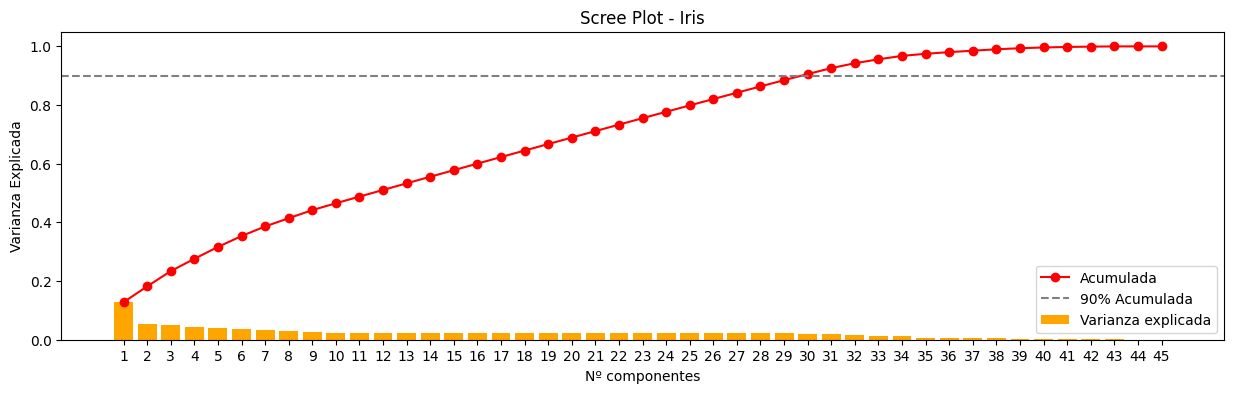

Nº componentes para >=90% de varianza en medical_cost = 30


In [134]:
pca = PCA(n_components=None, random_state=RANDOM_STATE).fit(X_insurance_std)

scree_plot(pca, title='Scree Plot - Iris')
k90_wine = np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.9)+1
print('Nº componentes para >=90% de varianza en medical_cost =', k90_wine)

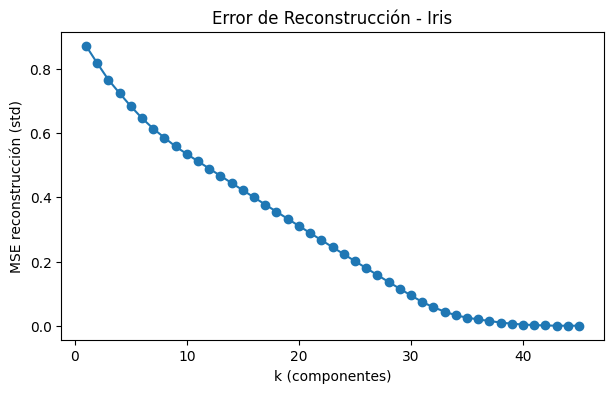

In [125]:
ks = range(1, X_insurance_std.shape[1]+1)
errs = []
for k in ks:
    p = PCA(n_components=k, random_state=RANDOM_STATE).fit(X_insurance_std)
    errs.append(reconstruction_error(X_insurance_std, p))

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(list(ks), errs, '-o')
ax.set_xlabel('k (componentes)')
ax.set_ylabel('MSE reconstrucción (std)')
ax.set_title('Error de Reconstrucción - Iris')
plt.show()

In [ ]:
def loadings_df(pca, feature_names):
    comps = pd.DataFrame(pca.components_, columns=feature_names)
    comps.index = [f'PC{i+1}' for i in range(comps.shape[0])]
    return comps.T.sort_index()

components = loadings_df(pca, X_num)
components

c:\Users\Roxane\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



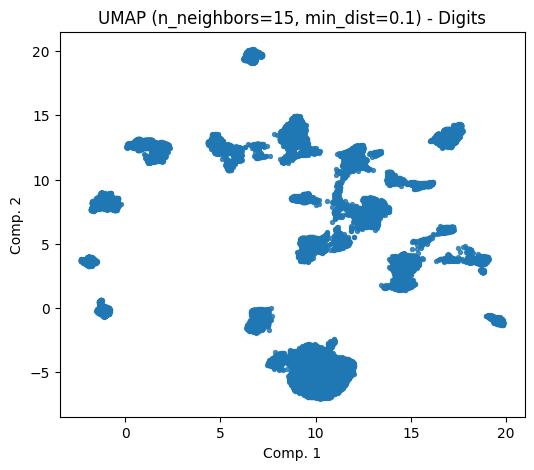

In [ ]:
#3/4min run
u1 = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=RANDOM_STATE)
X_u1 = u1.fit_transform(X_insurance_std)
scatter_2d(X_u1, title='UMAP (n_neighbors=15, min_dist=0.1) - Digits')

# **Resultado de la PCA**

In [135]:
Xp = PCA(n_components=30, random_state=RANDOM_STATE).fit_transform(X_insurance_std)
